In [1]:
import pandas as pd
import requests
import numpy as np
import requests
import bs4
import re
from datetime import datetime
from threading import Timer
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\jbrun\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jbrun\Ap

In [2]:
train = pd.read_excel(r'C:\Users\jbrun\Desktop\Corrugated_Boxes\Final_Clean_train.xlsx')

In [3]:
train.shape

(88896, 18)

In [4]:
# Dropping missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
Colors,85532,0.962158
Flute,24988,0.281093
Wall,24013,0.270125
Grade,22367,0.251609
Style,15647,0.176015
Calculated_Unit_Cost,0,0.000000
Assembled,0,0.000000
Vendor,0,0.000000
order_qty,0,0.000000
DC,0,0.000000


In [5]:
train = train.drop((missing_data[missing_data['Percent'] > .4]).index,1)

In [6]:
train.head()

,Location,Vendor,order_qty,Style,DC,DST,Assembled,Length,Width,Depth,Sq Footage,Grade,Flute,Wall,Has Attr,Negotiated,Calculated_Unit_Cost
0,LocQ,Vendor56,600,RSC,0,0,0,2135.0,16.00,16.0,971.388889,32.0,C,SW,1,0,1.2130
1,LocQ,Vendor371,6300,RSC,0,0,0,2135.0,16.00,16.0,971.388889,32.0,C,SW,1,0,1.2130
2,LocQ,Vendor371,3057,RSC,0,0,0,2135.0,16.00,16.0,971.388889,32.0,C,SW,1,0,1.2130
3,LocR,Vendor171,1044,RSC,0,0,0,28.0,11.75,1628.0,928.406684,NaN,NaN,NaN,0,0,0.9650
4,LocQ,Vendor44,100,RSC,0,0,0,8.0,8.00,3032.0,717.925347,32.0,NaN,NaN,0,0,0.8257


In [11]:
# Making dummy variables
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the train
train = dummies('Location',train)
train = dummies('Vendor',train)
train = dummies('Style',train)
train = dummies('Flute',train)
train = dummies('Wall',train)

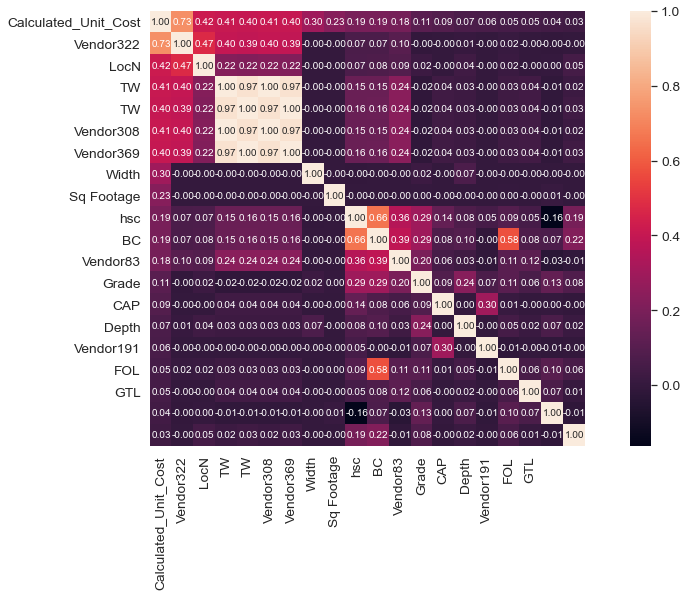

In [12]:
# PLotting correlation and adding the top ones to train columns
k = 18
plt.figure(figsize=(16,8))
corrmat = train.corr()

cols = corrmat.nlargest(k, 'Calculated_Unit_Cost')['Calculated_Unit_Cost'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
train.head()

,order_qty,DC,DST,Assembled,Length,Width,Depth,Sq Footage,Grade,Has Attr,...,AC,B,BC,C,CAA,CK,E,TW,SW,TW
0,600,0,0,0,2135.00,16.0,16.0,971.388889,32.0,1,...,0,0,0,1,0,0,0,0,1,0
1,6300,0,0,0,2135.00,16.0,16.0,971.388889,32.0,1,...,0,0,0,1,0,0,0,0,1,0
2,3057,0,0,0,2135.00,16.0,16.0,971.388889,32.0,1,...,0,0,0,1,0,0,0,0,1,0
6,185,0,0,0,22.25,9.5,1248.0,572.272135,248.0,0,...,0,0,1,0,0,0,0,0,0,0
7,195,0,0,0,22.25,9.5,1248.0,572.272135,248.0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
cols

Index(['Calculated_Unit_Cost', 'Vendor322', 'LocN', 'TW', 'TW', 'Vendor308',
       'Vendor369', 'Width', 'Sq Footage', 'hsc', 'BC', 'Vendor83', 'Grade',
       'CAP', 'Depth', 'Vendor191', 'FOL', 'GTL'],
      dtype='object')

In [15]:
train = train[cols]
cols

Index(['Calculated_Unit_Cost', 'Vendor322', 'LocN', 'TW', 'TW', 'Vendor308',
       'Vendor369', 'Width', 'Sq Footage', 'hsc', 'BC', 'Vendor83', 'Grade',
       'CAP', 'Depth', 'Vendor191', 'FOL', 'GTL'],
      dtype='object')

In [16]:
# Creating the training and test sets splitting 40/60
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Calculated_Unit_Cost', axis=1), train['Calculated_Unit_Cost'], test_size=0.4, random_state=10)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [17]:
X_train

,Vendor322,LocN,TW,TW,TW,TW,Vendor308,Vendor369,Width,Sq Footage,hsc,BC,Vendor83,Grade,CAP,Depth,Vendor191,FOL,GTL
62343,0,0,0,0,0,0,0,0,9.0,5.347222,0,0,0,321.0,0,8.0,0,0,0
21286,0,0,0,0,0,0,0,0,18.0,15.673611,0,0,0,32.0,0,12.0,0,0,0
62970,0,0,0,0,0,0,0,0,10.0,5.270833,0,0,0,32.0,0,6.0,0,0,0
579,0,0,0,0,0,0,0,0,40.0,99.661458,1,0,0,32.0,0,40.0,0,0,0
68241,0,0,0,0,0,0,0,0,8.0,4.354167,0,0,0,32.0,0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44900,0,0,0,0,0,0,0,0,12.0,8.506944,0,0,0,32.0,0,12.0,0,0,0
82794,0,0,0,0,0,0,0,0,6.0,2.187500,0,0,0,32.0,0,4.0,0,0,0
46433,0,0,0,0,0,0,0,0,12.0,8.256944,0,0,0,32.0,0,8.0,0,0,0
64247,0,0,0,0,0,0,0,0,10.0,5.034722,0,0,0,32.0,0,4.0,0,0,0


In [18]:
y_train

array([[0.311     ],
       [1.284     ],
       [0.36      ],
       ...,
       [0.46100062],
       [0.27712   ],
       [0.7965    ]])

In [29]:
# DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 10)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [31]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

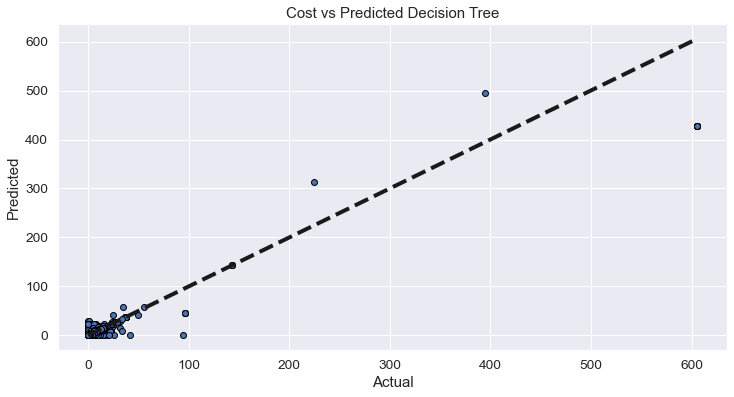

In [54]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, dtr_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Cost vs Predicted Decision Tree")
plt.rcParams["figure.figsize"] = [12,6]

plt.show()

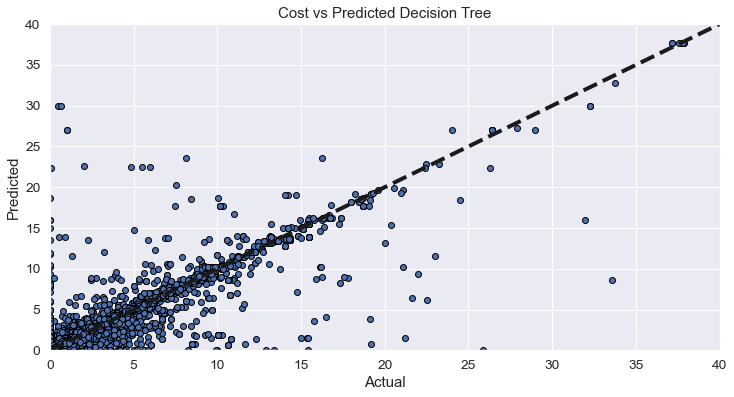

In [53]:
# Plot scaled down
fig, ax = plt.subplots()
ax.scatter(y_test, dtr_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlim([0, 40])
plt.ylim([0, 40])
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Cost vs Predicted Decision Tree")
plt.rcParams["figure.figsize"] = [12,6]

plt.show()

Feature: 0, Score: 0.59448
Feature: 1, Score: 0.00063
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.05576
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00003
Feature: 6, Score: 0.14055
Feature: 7, Score: 0.10786
Feature: 8, Score: 0.02448
Feature: 9, Score: 0.04897
Feature: 10, Score: 0.00074
Feature: 11, Score: 0.00177
Feature: 12, Score: 0.00635
Feature: 13, Score: 0.00829
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00474
Feature: 16, Score: 0.00042
Feature: 17, Score: 0.00470
Feature: 18, Score: 0.00019


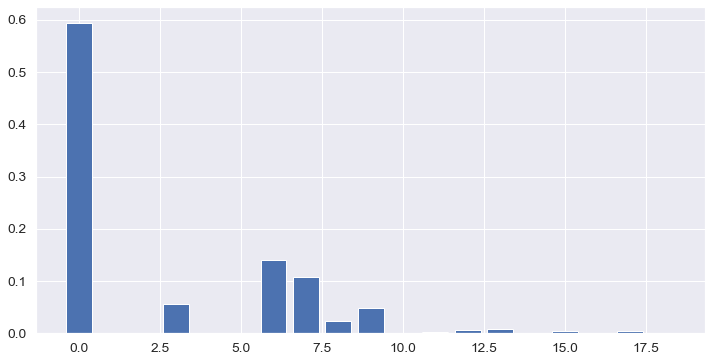

In [33]:
# get importance
importance = dtreg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<AxesSubplot:>

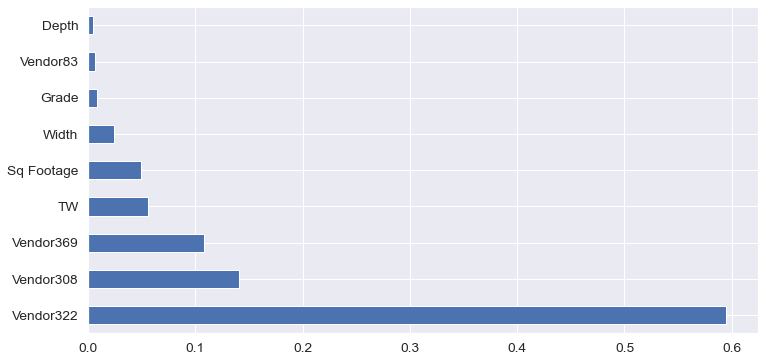

In [34]:
(pd.Series(dtreg.feature_importances_, index=X_train.columns)
   .nlargest(9)
   .plot(kind='barh')) 

In [35]:
print('R-Squared:', r2_score(y_test, dtr_pred))
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

R-Squared: 0.9056746424569214
MAE: 0.3454586965622943
RMSE: 3.423352555186524


In [36]:
dtr_Predicted = pd.DataFrame(dtr_pred)
print(dtr_Predicted)

               0
0      13.944433
1       1.326877
2       0.847262
3       0.520938
4       0.664723
...          ...
21100   1.256653
21101   0.995002
21102   0.903886
21103   0.386143
21104   0.373083

[21105 rows x 1 columns]


In [37]:
dtr_Actual = pd.DataFrame(y_test)
print(dtr_Actual)

               0
0      15.500000
1       1.330549
2       1.170000
3       0.717000
4       1.098007
...          ...
21100   1.601467
21101   1.819200
21102   1.150000
21103   0.367100
21104   0.390000

[21105 rows x 1 columns]


In [38]:
print(dtreg.score(X_train, y_train))

0.7884362655003533


In [39]:
# GRADIENT BOOSTING

In [40]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
params = {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 500,
          'learning_rate': 0.2, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, np.ravel(y_train))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
clf_pred=clf.predict(X_test)
clf_pred=clf_pred.reshape(-1,1)

Feature: 0, Score: 0.64580
Feature: 1, Score: 0.00417
Feature: 2, Score: 0.00224
Feature: 3, Score: 0.00058
Feature: 4, Score: 0.00353
Feature: 5, Score: 0.00048
Feature: 6, Score: 0.14286
Feature: 7, Score: 0.11250
Feature: 8, Score: 0.01975
Feature: 9, Score: 0.05141
Feature: 10, Score: 0.00048
Feature: 11, Score: 0.00097
Feature: 12, Score: 0.00349
Feature: 13, Score: 0.00713
Feature: 14, Score: 0.00045
Feature: 15, Score: 0.00298
Feature: 16, Score: 0.00059
Feature: 17, Score: 0.00033
Feature: 18, Score: 0.00025


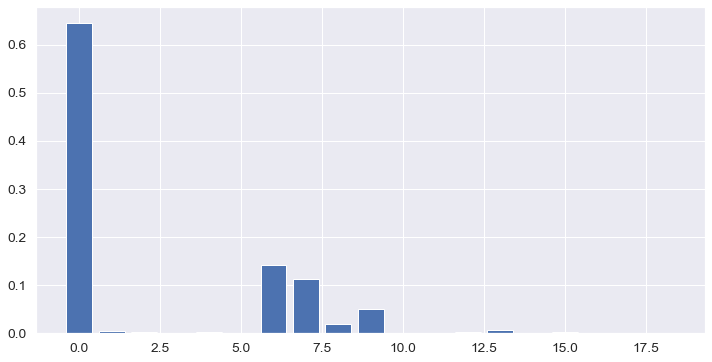

In [43]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<AxesSubplot:>

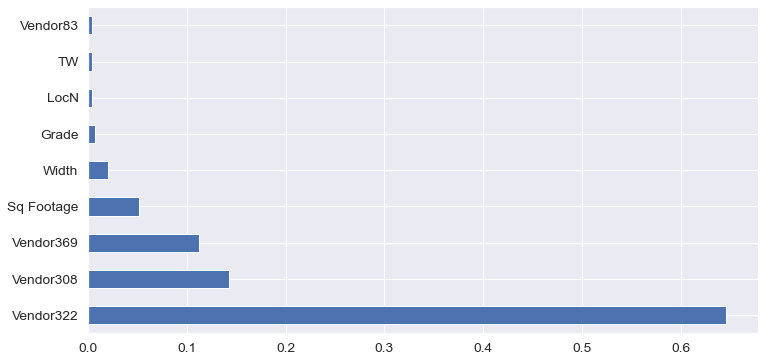

In [44]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(9)
   .plot(kind='barh')) 

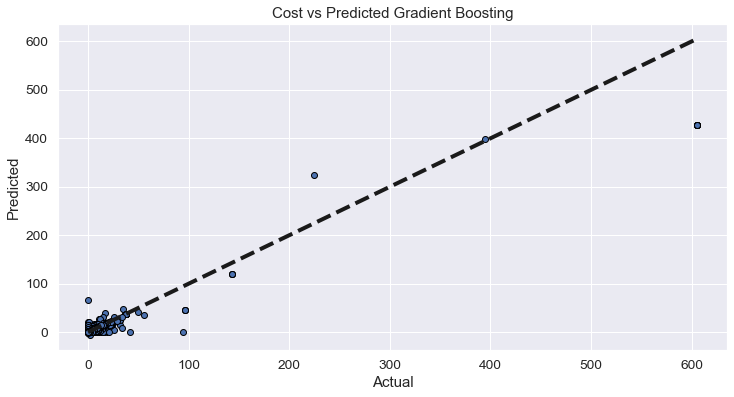

In [55]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, clf_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Cost vs Predicted Gradient Boosting")
plt.rcParams["figure.figsize"] = [12,6]

plt.show()

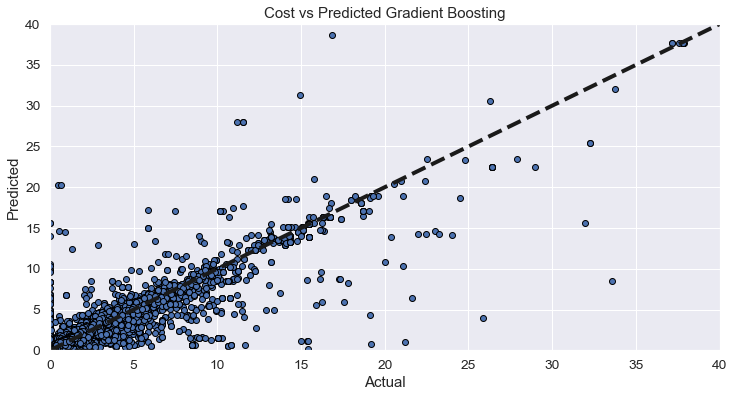

In [56]:
# Plot scaled down
fig, ax = plt.subplots()
ax.scatter(y_test, clf_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlim([0, 40])
plt.ylim([0, 40])
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Cost vs Predicted Gradient Boosting")
plt.rcParams["figure.figsize"] = [12,6]

plt.show()

In [46]:
from sklearn.metrics import r2_score 
print('R-Squared:', r2_score(y_test, clf_pred))
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

R-Squared: 0.906699067274612
MAE: 0.4552942096918593
RMSE: 3.4047120678174454


In [47]:
clf_Predicted = pd.DataFrame(clf_pred)
print(clf_Predicted)

               0
0      13.941579
1       1.177214
2       0.688395
3       0.733044
4       0.669871
...          ...
21100   1.856550
21101   0.890849
21102   1.144278
21103   0.527013
21104   0.597702

[21105 rows x 1 columns]


In [48]:
clf_Actual = pd.DataFrame(y_test)
print(clf_Actual)

               0
0      15.500000
1       1.330549
2       1.170000
3       0.717000
4       1.098007
...          ...
21100   1.601467
21101   1.819200
21102   1.150000
21103   0.367100
21104   0.390000

[21105 rows x 1 columns]


In [49]:
#clf_Predicted.to_csv (r'C:\Users\jbrun\Desktop\Corrugated_Boxes\clf_Predicted.csv', index = False, header=True)
#clf_Actual.to_csv (r'C:\Users\jbrun\Desktop\Corrugated_Boxes\clf_Actual.csv', index = False, header=True)


In [50]:
print(clf.score(X_train, y_train))

0.7854290015664234


In [ ]:
# Code References
# https://www.kaggle.com/aditi81k/car-price-prediction
# https://machinelearningmastery.com/calculate-feature-importance-with-python/